In [1]:
import pandas as pd 


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [14]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [18]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt

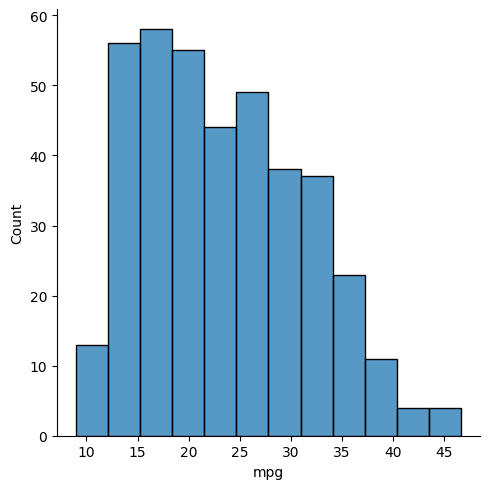

In [26]:
sns.displot(data['mpg'])

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[1.2], [2.5], [3.1], [4.3], [5.7]]
y = [[5.4], [8], [9.2], [11.6], [14.4]]

regressor = LinearRegression().fit(x, y)

print(regressor.coef_)
print(regressor.intercept_)

[[2.]]
[3.]


In [28]:
data['mpg'].skew()

0.45709232306041025

In [29]:
data['mpg'].kurt()

-0.5159934946351457

In [30]:
def scale(a):
    b = (a - a.min()) / (a.max() - a.min())
    return b

In [32]:
data_scale = data.copy()

In [36]:
data_scale['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale['acceleration'] = scale(data_scale['acceleration'])
data_scale['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])
data_scale['cylinders'] = scale(data_scale['cylinders'])

In [37]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1


In [38]:
data_scale.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,75.979592,1.576531
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,3.683737,0.805518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,73.000000,1.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,76.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,79.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.000000,3.000000


In [45]:
data_scale['Country_code'] = data.origin.replace([1,2,3], ['USA', 'Europe', 'Japan'])
data_scale.origin.unique()

array([1, 3, 2], dtype=int64)